In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
seed = 5555

In [8]:
def MAP_hpw(sx, dt):
    
    lam = np.log(np.sum(sx[1:] ** 2) / np.sum(sx[1:] * sx[:-1])) / dt

    I = 1 - np.exp(-2 * lam  *dt)
    D = lam * (np.sum((sx[1:] - sx[:-1] * np.exp(-lam*dt)) ** 2) / I / len(sx))

    return D, lam

In [9]:
## must do this because of the way random seeds are generated in numpy (sequentially random) 
def base_HPW_D(init_pos, t, D, well_pos, lambda_): 
    x0, y0 = init_pos 
    x_c, y_c = well_pos 
    x = [x0] 
    y = [y0]
    tau = np.diff(t) 
    for idx in range(len(t)):  
        mu_x = x_c + (x[-1] - x_c)*np.exp(-lambda_*tau) 
        sd_x = np.sqrt(D/lambda_ * (1. - np.exp(-2.*lambda_*tau))) 
        x.append((np.random.normal(loc=mu_x, scale=sd_x, size=1))[0]) 
        
        mu_y = y_c + (y[-1] - y_c)*np.exp(-lambda_*tau) 
        sd_y = np.sqrt(D/lambda_ * (1. - np.exp(-2.*lambda_*tau))) 
        y.append((np.random.normal(loc=mu_y, scale=sd_y, size=1))[0]) 
    return np.vstack((x,y)) 

In [18]:
np.random.seed(seed) 
error_d, error_l = [], []
frame = []
for i in range(900): 
    init_pos = [0., 0.]
    t_ = np.linspace(0, 2, 1000-i) 
    D = 0.175 
    well_pos = [0, 0] 
    lambda_ = 255 
    baseHPW = base_HPW_D(init_pos, t_, D, well_pos, lambda_) 
    d_map, l_map = MAP_hpw(baseHPW[0], np.diff(t_)[0])
    error_d.append(d_map / D)
    error_l.append(l_map / lambda_)
    frame.append(2 / (1000-i))

C:\Users\jiayu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


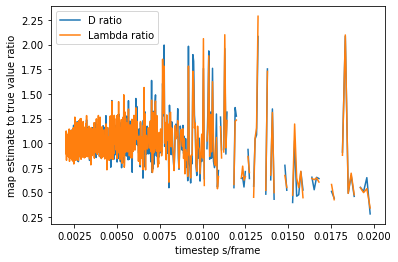

In [22]:
plt.plot(frame, error_d, label='D ratio')
plt.plot(frame, error_l, label='Lambda ratio')
plt.ylabel('map estimate to true value ratio')
plt.xlabel('timestep s/frame')
plt.legend();